# Global Healthy and Sustainable City Indicators (GHSCI) 
## Example analysis for Las Palmas de Gran Canaria, Spain

This notebook contains an example of how the GHSCI tool can be used to calculate and report on indicators for a study region of interest, such as a city, neighbourhood or precinct.

For more information on using a Jupyter notebook, see https://docs.jupyter.org/en/latest/

## Configuration

A configured example study region file has been provided with the software in the folder `process/configuration/regions`:

`example_ES_Las_Palmas_2023.yml`
  - This example configuration file defines analysis for the Spanish city of Las Palmas de Gran Canaria with a target time point of 2023
  - The codename `example_ES_Las_Palmas_2023` illustrates a recommended naming structure that describes the country (ES; [two-letter country code](https://en.wikipedia.org/wiki/ISO_3166-2#Current_codes) for Spain), city name, and year analysis aims to represent.
    - For cities with shared names in different countries this patter can differentiate between the two (i.e. ES_Valencia_2023 refers to Valencia in Spain, while VE_Valencia_2023 refers to the city Venezuela, and both using the same time point of 2023)
  - You can use suffixes or prefixes as required to ensure your codenames clearly describe the study region configurations they represent, but should avoid using spaces

New study regions can be configured either by copying, renaming and editing this file in a text editor, or by running the configuration utility (e.g. `configure codename_for_your_city` at the command line, or `ghsci.configure("codename_for_your_city")`.

Later on in this script directions for conducting a **sensitivity analysis** by copying and modifying the example configuration file:

`ES_Las_Palmas_2023_test_not_urbanx.yml`
  - This study region configuration provides a sensitivity analysis for the use of a city administrative boundary without restricting to the intersection with an urban region using the Global Human Settlements Layer Urban Centres Database (ie. `ghsl_intersection = false` instead of `true`)
  - We can use this later on in the workflow to compare the indicator results as a sensitivity analysis and evaluate the impact of this methodological decision

## Import the GHSCI software

To use the GHSCI software in a Jupyter notebook (like this example) or in Python running in the GHSCI Docker container, it first needs to be loaded as a Python module:

In [ ]:
import ghsci

## Using the GHSCI software to load a study region

With the GHSCI software imported (as done at the top of this page, using `import ghsci`), a study region configuration can be loaded up for analysis.  

A brief summary of how to use the GHSCI tool can be viewed by running the GHSCI help function, `ghsci.help()`, as illustrated below.

In [ ]:
ghsci.help()

The output of the `help()` command above describes how to load up a configured study region for analysis.

We'll now load up the example city using the guidance above:

In [ ]:
r = ghsci.example()

As described in the output above, to load the example study region as you would your own configured city, you could do the following:

In [ ]:
r = ghsci.Region('example_ES_Las_Palmas_2023')

## Analysis

The analysis function `r.analysis()` runs the following series of scripts located in the `subprocesses` folder for the loaded study region configuration (that in this example code we represent using the character `r`, short for "region"):

|**Subprocess step** | **Description** | 
|--------------------|-----------------|
|_00_create_database.py | Create database | 
|_01_create_study_region.py | Create study region | 
|_02_create_osm_resources.py | Create OpenStreetMap resources | 
|_03_create_network_resources.py | Create pedestrian network | 
|_04_create_population_grid.py | Align population distribution | 
|_05_compile_destinations.py | Compile destinations | 
|_06_open_space_areas_setup.py | Identify public open space | 
|_07_locate_origins_destinations.py | Analyse local neighbourhoods | 
|_08_destination_summary.py | Summarise spatial distribution | 
|_09_urban_covariates.py | Collate urban covariates | 
|_10_gtfs_analysis.py | Analyse GTFS Feeds | 
|_11_neighbourhood_analysis.py | Analyse neighbourhoods | 
|_12_aggregation.py | Aggregate region summary analyses | y analyses',

In [ ]:
r.analysis()

## Generate resources

The `r.generate()` function is used to generate data, metadata, maps, figure and reports, optionally in multiple languages, for processed cities.  It lists the resources as they are generated.

In [ ]:
# generate resources, but suppress display of images in this Jupyter Notebook to reduce filesize
r.generate()

## Sensitivity analysis

To evaluate the impact of your methodological decisions taken when configuring your study region, including selection of data sources, you may conduct sensitivity analyses.  An example could be run to explore the impact of the decision to restrict to the urban area (`example_ES_Las_Palmas`) or not (`ES_Las_Palmas_2023_test_not_urbanx`).  *A priori*, we would assume that by restricting to an urban area would result in higher estimates for population density and street connectivity, and more proximal access to amenities.

Other comparisons are possible.  For example, 

- one could vary the study region boundary supplied, the parameter used for consolidating intersections, supply additional destination data or modify the definitions used to extract features of interest from the OpenStreetMap data.
  - When doing these modifications, the resulting generated datasets can be inspected by local experts to evaluate how they conform with their knowledge of the area under study.  
- An official reference set of data could be used for example for population, to evaluate the use of a modelled population data layer compared with the official population data.  
- Population data for demographic sub-groups could be used (eg. using strata of age and/or sex, or other characteristics as available); the resulting aggregated study region indicators would provide population-specific estimates.
- Analyses could be conducted for different time points using historical data
- Finally, data could be modified to represent hypothetical interventions and evaluate their impact on the calculated indicators

To run the following analysis, use the Jupyter Lab file browser to the left to duplicate the file `process/configuration/regions/example_ES_Las_Palmas.yml` and rename the new file as `example_ES_Las_Palmas_test_not_urbanx.yml`.  Open this file in Jupyter Lab (or another text editor) and amend the entry `ghsl_urban_intersection: true` in the study region boundary section (on Line 56) to read `ghsl_urban_intersection: false`.

In [ ]:
comparison_codename = 'ES_Las_Palmas_2023_test_not_urbanx'
r = ghsci.Region(comparison_codename)
r.analysis()
r.generate()

## Comparisons

As suggested above, a variety of interesting comparisons can be made using generated indicator data

- Sensitivity analyses exploring the impact of methodological choices
- Comparisons between different study regions for the same point in time
- Comparisons within a city for different points in time
- Evaluating the impact of hypothetical scenarios and/or interventions, using modified data

Below, we compare results of the updated analysis with the example analysis we ran earlier (that are retained in the underlying database).  This allows us to evaluate the overall impact of restricting the study region to the urban area, rather than using the administrative boundary.

In [ ]:
r.compare('example_ES_Las_Palmas_2023')

We can see from the above comparison that, as expected, density estimates and the percentage of population with access to most kinds of amenities evaluated were higher with restriction to the empirically defined urban region (63 sqkm compared with 103.3 sqkm; the latter being 1.6 times the size but having only approximately 10% more population).  The differences in walkability results reflect the fact that most people live in the smaller, more urbanised portion of the study region.  The most likely explanation for the observed differences in indicators is that urban areas are associated with higher population, street connectivity and levels of amenity provision.  However, the possibility of data bias should also be considered and if possible evaluated: data may have more completeness, detail and be more up to date for urban areas.  

Hence, restriction to the empirical urban area is an important methodological choice: it could mitigate bias for areas in cases where data is found lacking, however, it could also exclude important sectors of the population living in urban fringe areas that may be of interest and whose inclusion may be important for a more complete understanding of the equitable distribution of healthy and sustainable urban environments.  

Decisions such as these need to be made by analysts with local area knowledge or in consulation with local experts to ensure the representation and analysis of the study region in question is fair, meaningful and useful for informing local decision making.  Sensitivity analyses can be used to justify the decisions made when configuring analyses, to understand their consequences for inference and help validate and thus ensure quality of the indicator data, estimates and reports produced prior to dissemination.

## More advanced usage and mapping
The `Region` object contains a number of additional methods for performing additional tasks that can be summarised by entering `r.help()`:

In [ ]:
r.help()

For example, you could  list the tables that have been generated in the database for this study region:

In [ ]:
r.get_tables()

To retrieve and display a dataframe of processed study region results, run the following:

In [ ]:
r.get_df('indicators_region')

These may be easier viewed transposed with results in rows instead of columns:

In [ ]:
r.get_df('indicators_region').set_index('study_region').transpose()

The GHSCI web app also provides a convenient way to view formatted summaries of study region results.

An interactive choropleth map for a particular indicator of interest can also be generated, saved and displayed:

In [ ]:
map = r.choropleth(
    field='local_walkability',
    layer=r.config['grid_summary'],
    id='grid_id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.1,
    title='Local walkability',
    attribution='Global Healthy and Sustainable City Indicators Collaboration'
)
map

Here is a screenshot of what the above cell looks like when run:

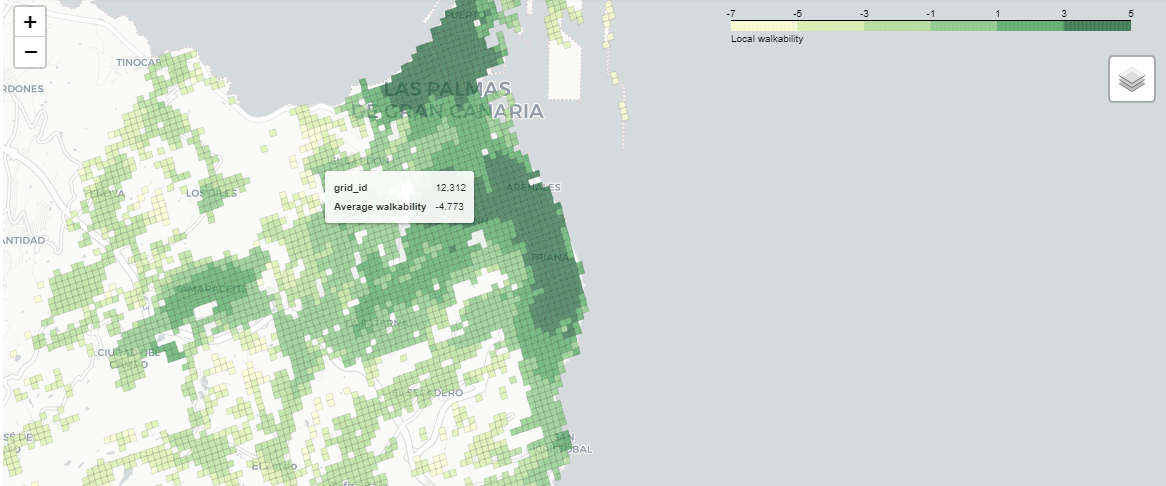

In the interactive version, you can hover over grid cells to view the value of the specified indicator for that location. You can change graphic parameters like fill color, see [how to choose colormaps in matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html#classes-of-colormaps)

As a result of running the above process, this interactive map HTML file and the other generated resources can be found in the study region data output folder:

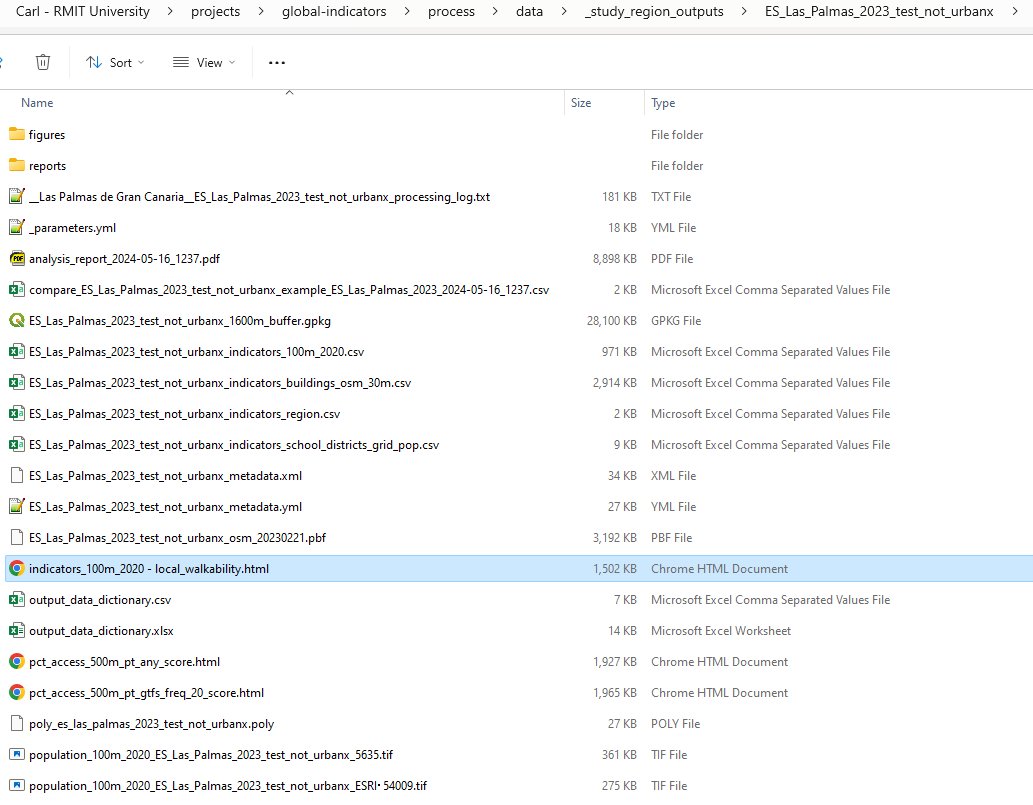